Problem 1: [7 marks]
1. Use California Housing Dataset:
from sklearn.datasets import fetch_california_housing
2. Perform an 80:20 train/test split, followed by an 80:20 train/validation split from the
trainset. Perform standard Scaling on all splits.
3. Perform Linear Regression and Non-Linear Regression using an appropriate Polynomial
curve to reduce error on the Train and Validation Datasets. To prevent Overfitting, use L2
Regularizer with appropriate Lambda values. (Optimize for 100 Epochs)
4. Plot the loss vs epoch curve on different parameters of Polynomial degree and Lambda
values on the Train and validation sets to choose appropriate values.
5. Predict on the Test set for any top-3 fine-tuned models.
6. Print SSE, R2 scores for Train, Validation, and Test Sets for top-3 Models

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
data = fetch_california_housing() #load data
X = data.data
y = data.target

#Train Test Validation split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [73]:

#standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [74]:
#sse method
def sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# polynomial ridge training method
def train_poly_ridge(X_train, y_train, X_val, y_val, degree, alpha, epochs=100):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = Ridge(alpha=alpha, max_iter=epochs)
    train_losses = []
    val_losses = []

    for _ in range(epochs):
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_val_pred = model.predict(X_val_poly)
        train_losses.append(mean_squared_error(y_train, y_train_pred))
        val_losses.append(mean_squared_error(y_val, y_val_pred))

    return model, train_losses, val_losses, poly


results = []

# linear regression 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_val_pred = linear_model.predict(X_val)

results.append({
    'degree': 1,
    'alpha': 0,
    'model': linear_model,
    'poly': None,
    'train_losses': None,
    'val_losses': None,
    'train_sse': sse(y_train, y_train_pred),
    'val_sse': sse(y_val, y_val_pred),
    'train_r2': r2_score(y_train, y_train_pred),
    'val_r2': r2_score(y_val, y_val_pred)
})


In [75]:

#polynomial Ridge models
degrees = [2, 3]
alphas = [0.01, 0.1, 1, 10]
#alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1]


for degree in degrees:
    for alpha in alphas:
        model, train_losses, val_losses, poly = train_poly_ridge(X_train, y_train, X_val, y_val, degree, alpha)
        X_train_poly = poly.transform(X_train)
        X_val_poly = poly.transform(X_val)

        y_train_pred = model.predict(X_train_poly)
        y_val_pred = model.predict(X_val_poly)

        results.append({
            'degree': degree,
            'alpha': alpha,
            'model': model,
            'poly': poly,
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_sse': sse(y_train, y_train_pred),
            'val_sse': sse(y_val, y_val_pred),
            'train_r2': r2_score(y_train, y_train_pred),
            'val_r2': r2_score(y_val, y_val_pred)
        })

#results

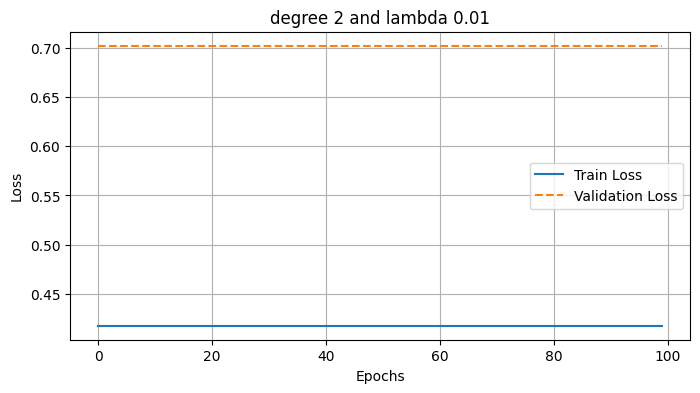

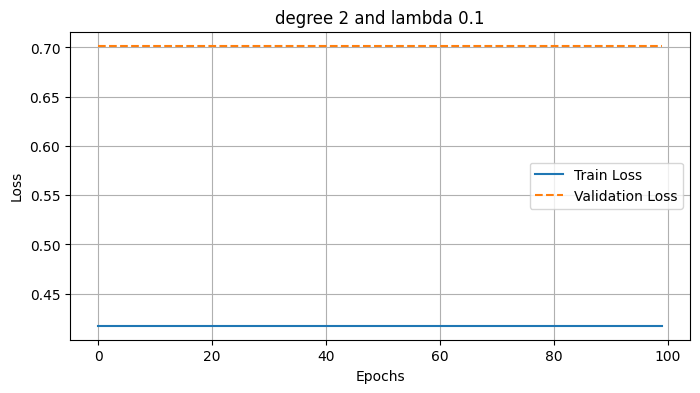

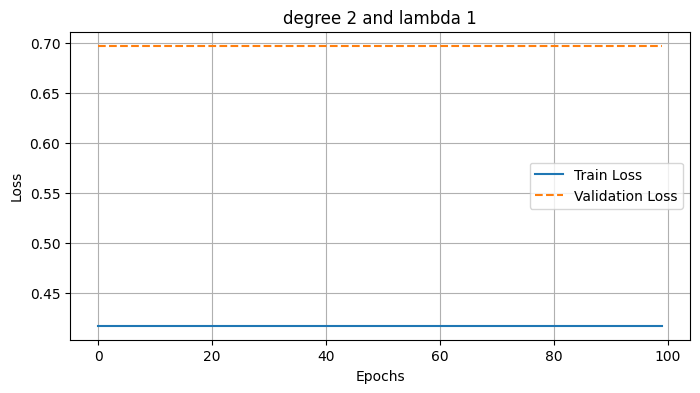

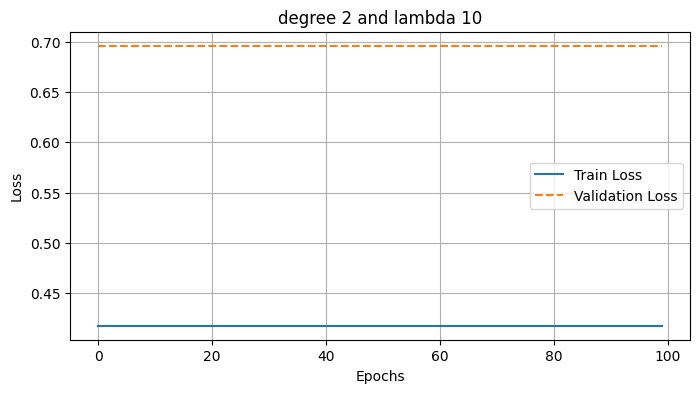

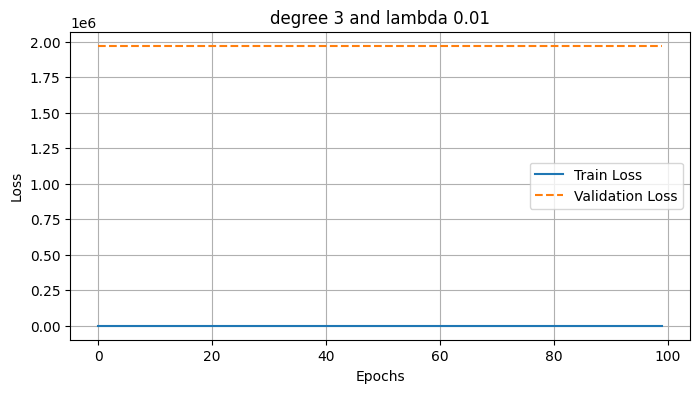

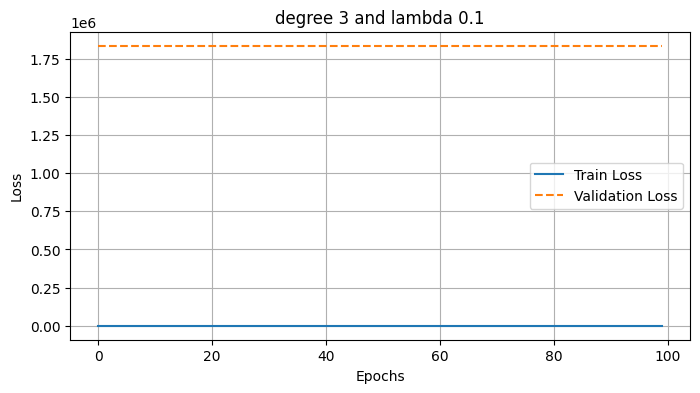

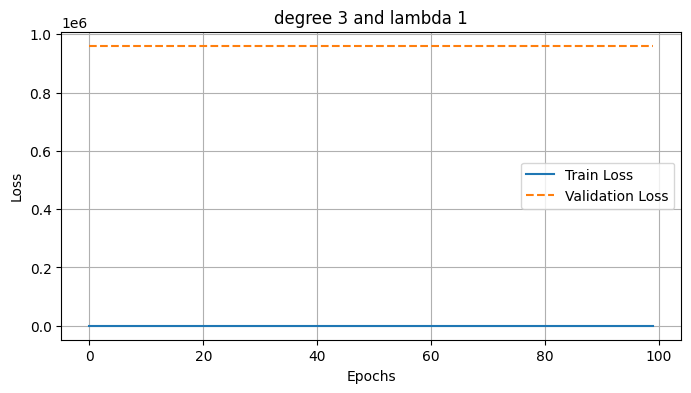

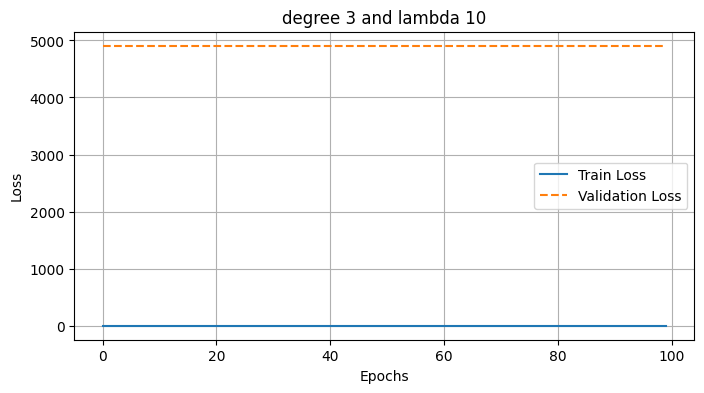

In [ ]:
# plot  loss curves
for res in results:
    if res['train_losses'] is not None:
        plt.figure(figsize=(8, 4))
        plt.plot(res['train_losses'], label='Train Loss')
        plt.plot(res['val_losses'], label='Validation Loss', linestyle='--')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('degree ' + str(res['degree']) + ' and lambda ' + str(res['alpha']))
        plt.legend()
        plt.grid(True)
        plt.show()

In [77]:



#  top 3 models based on validation SSE
top_models = sorted(results, key=lambda x: x['val_sse'])[:3]

# predict on test set using top 3 models
for i, res in enumerate(top_models):
    model = res['model']
    poly = res['poly']

    if poly is not None:
        X_test_input = poly.transform(X_test)
    else:
        X_test_input = X_test

    y_test_pred = model.predict(X_test_input)
    test_sse = sse(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print('')
    print('Model', i+1)
    print('Degree:', res['degree'])
    print('Lambda:', res['alpha'])
    print('Train SSE:', res['train_sse'])
    print('Train R2:', res['train_r2'])
    print('Validation SSE:', res['val_sse'])
    print('Validation R2:', res['val_r2'])
    print('Test SSE:', test_sse)
    print('Test R2:', test_r2)



Model 1
Degree: 1
Lambda: 0
Train SSE: 6774.966571904679
Train R2: 0.6131488911003316
Validation SSE: 1779.0155057941988
Validation R2: 0.6097023914123487
Test SSE: 2288.862680264573
Test R2: 0.57687061236559

Model 2
Degree: 2
Lambda: 10
Train SSE: 5517.308811605112
Train R2: 0.6849612453052588
Validation SSE: 2298.9556172230355
Validation R2: 0.49563290666725757
Test SSE: 2095.7850240563976
Test R2: 0.612563811062774

Model 3
Degree: 2
Lambda: 1
Train SSE: 5514.021516357462
Train R2: 0.6851489501150667
Validation SSE: 2304.0877750906557
Validation R2: 0.4945069642928923
Test SSE: 2188.652186006894
Test R2: 0.5953959723338393
